In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import h5py
from pathlib import Path
import os
import sys
sys.path.append(os.getcwd() + '/../..')
sys.path.append(os.getcwd() + '/..')
from filepaths import filepath_from_ml_artifacts_uri
from analysis.iclr.plotting import settings, fig_size, cb_line_cycler, cb_line_cycler_solid, cb_marker_cycler, savefig
from plot_hdf5_dataset import plot_dataset
from iclr_paper_path import get_paper_path
import matplotlib
settings()
import matplotlib.pyplot as plt

path_dataset = filepath_from_ml_artifacts_uri('mlflow-artifacts:/829789035554334690/7e71f73940ff4daca508d0e78a511154/artifacts/dataset.hdf5')

In [2]:
dataset = h5py.File(path_dataset, 'r')
print(dataset.keys())

<KeysViewHDF5 ['common_test', 'common_validation', 'controls_names', 'outputs_names', 'parameters_names', 'states_der_names', 'states_names', 'test', 'time', 'train', 'validation']>


In [5]:
dataset['common_test'].keys()

<KeysViewHDF5 ['controls', 'kl_lat_controls', 'kl_lat_controls_per_dim', 'kl_lat_parameters', 'kl_lat_state_0', 'kl_lat_state_0_per_dim', 'kl_lat_states', 'kl_loss', 'lat_controls_logvar', 'lat_controls_mu', 'lat_dim_controls_populated', 'lat_dim_parameters_populated', 'lat_dim_state_0_populated', 'lat_dim_states_populated', 'lat_state_0_logvar', 'lat_state_0_mu', 'lat_states', 'loss', 'ode_calls_forward', 'outputs', 'outputs_hat', 'parameters', 'reconstruction_loss', 'reconstruction_loss_outputs', 'reconstruction_loss_state_0', 'reconstruction_loss_states', 'rmse_outputs', 'rmse_state_0', 'rmse_states', 'states', 'states_der', 'states_hat', 'time_odeint', 'time_outputs']>

In [18]:
dataset_type = 'common_test'
kl_lat_state_0_per_dim = dataset[dataset_type]['kl_lat_state_0_per_dim'][:]
lat_states_hat = dataset[dataset_type]['lat_states'][:]
time = dataset['time'][:]

finding path that contains "code", then going up one level to find "LaTeX"
e:\projects\balanced_neural_odes_internal\code\python\analysis\iclr
e:\projects\balanced_neural_odes_internal\code\python\analysis
e:\projects\balanced_neural_odes_internal\code\python
e:\projects\balanced_neural_odes_internal\code
e:\projects\balanced_neural_odes_internal
E:\projects\balanced_neural_odes_internal\LaTeX\ICLR 2025 Template\figures\BNODE\collpase_vanilla.png
E:\projects\balanced_neural_odes_internal\LaTeX\ICLR 2025 Template\figures\BNODE\collpase_vanilla.svg


e:\projects\balanced_neural_odes_internal\code\python\analysis\iclr\plotting.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(_path.with_suffix(f".{file_type}"), **kwargs, bbox_inches='tight', pad_inches=0)
c:\Users\userXXXjuliu\.conda\envs\ma_userXXX\lib\site-packages\IPython\core\events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
c:\Users\userXXXjuliu\.conda\envs\ma_userXXX\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


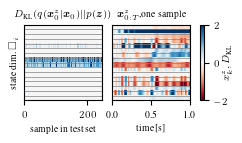

In [63]:
fig = plt.figure(figsize=fig_size(0.85,3.6, n_figs_per_width=2), tight_layout=True)
fontsize = 7

grid_spec = matplotlib.gridspec.GridSpec(1, 3, width_ratios=[1,1,0.05], wspace=0.2, top=1.0, left=0.0, right=1.0)
ax = [fig.add_subplot(grid_spec[i]) for i in range(3)]
for i in range(1,2):
    # share y axis
    ax[i].sharey(ax[0])
    # remove y ticks
    ax[i].set_yticks([])
cmap = 'RdBu'

ax[0].imshow(kl_lat_state_0_per_dim.T, aspect='auto', cmap = cmap, interpolation= 'none', vmin=-2, vmax=2)
# add horizontal lines on y axis
for i in range(1, kl_lat_state_0_per_dim.shape[1]):
    ax[0].axhline(i-0.5, color='grey', lw=0.5)
ax[0].set_xlabel('sample in test set', fontsize=fontsize)
ax[0].set_ylabel('state dim. $\square_i$', fontsize=fontsize)
ax[0].set_title(r'\noindent$D_{\text{KL}}(q(\boldsymbol{x}^z_0|\boldsymbol{x}_0)||p(\boldsymbol{z}))$', fontsize=fontsize)

ax[1].imshow(lat_states_hat[0,:, :], aspect='auto', cmap = cmap, interpolation= 'none', vmin=-2, vmax=2)
# add horizontal lines on y axis
for i in range(1, lat_states_hat.shape[1]):
    ax[1].axhline(i-0.5, color='grey', lw=0.5)
# ax[1].set_xlabel(r'time step $k$', fontsize=fontsize)
ax[1].set_title(r'\noindent $\boldsymbol{x}^z_{0:T}$,one sample', fontsize=fontsize, loc='center')
n_ticks = 3
idx = np.linspace(0, time.shape[0], n_ticks)
_time = idx * (max(time)-min(time)) / time.shape[0]
i=1
ax[i].set_xticks(np.linspace(0, time.shape[0], n_ticks))
ax[i].set_xticklabels([f'{_time[i]:.1f}' for i in range(n_ticks)])
ax[i].set_xlabel('time [s]', fontsize=fontsize)

# add colorbar to the right
cbar = plt.colorbar(ax[1].images[0], cax=ax[2], orientation='vertical')
cbar.set_label(r'\noindent $x^z_k, D_{\text{KL}}$', fontsize=fontsize, loc='center', labelpad=-4.0)
cbar.ax.tick_params(labelsize=fontsize)

# set all x ticks to fontsize
for i in range(2):
    ax[i].tick_params(axis='x', labelsize=fontsize)

savefig(fig, get_paper_path('BNODE', 'collpase_vanilla'))

In [10]:
savefig(fig, '../../../../latex/thesis_chapters/figures/Methods/latent-ode/vanilla_lat_ode_state_reduction_collapse')